# CNN: What your Shoes say about you? 

## Introduction

Scientists claimed that we can predict other people's personalities by looking at the shoes they are wearing. Out of interest, to test the hypothesis, a CNN machine learning model will be built to test if the model can predict my personality correctly. 



This article: https://www.rd.com/list/shoes-personality/ has provided the theoretial background for this experiement, explaing how the type and shape of shoes are related to various personalities.
- Boots:Boots wearers are always looking ahead</br>
- FlashyStilettos: Women in flashy stilettos work hard and have excellent taste </br>
- Flats: Flats fans are behind-the-scenes leaders </br>
- FlipFlops: Flip-flop fans are laid back </br>
- Sneakers: Sneaker buffs get along with everyone </br>


The goal of this project is to build a machine learning classifier that uses Convolutionry Neural Network (CNN) to classify images of different shoes and identify the personalities accordingly.</br>

There are five classes, which are Boots, FlashyStilettos, Flats, FlipFlops, and Sneakers. For the training set, each class contains 224 imgaes. For the test set, there are 64 images for each classes.</br> 

The training dataset is gathered from the Google Image and the test dataset is selected randomly from the provided Shoes database.


Name: Muyang Li </br>
Student number:29816741

## Importing the Libraries

In [2]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

## Data Preprocessing

### Preprocessing the Training Set

In [3]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('Dataset/Training_Set',
                                                 target_size = (64, 64), 
                                                 batch_size = 32, 
                                                 class_mode = 'categorical')


Found 1113 images belonging to 5 classes.


### Preprocessing the Test Set

In [4]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('Dataset/Test_Set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 320 images belonging to 5 classes.


## Building the CNN Model

### Step 1 - Initialising the Model

In [5]:
Model = tf.keras.models.Sequential()

### Step 2 - Adding First Convolution Layer 
The number of filters directly affects the accuracy level of the model, increasing it will increase the accuracy. For this model, we will first try a moderate number of filters:10 filters and 3 set of relu.

In [6]:
Model.add(tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation='relu', input_shape=[64, 64, 3])) 

### Step 3 - Pooling the First Layer

In [7]:
Model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Step 4 - Adding a Second Convolutional Layer

In [8]:
Model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))

### Step 5 - Pooling the Second Layer

In [9]:
Model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Step 6 - Flattening

In [10]:
Model.add(tf.keras.layers.Flatten())

### Step 7 - Full Connection

In [11]:
Model.add(tf.keras.layers.Dense(units=128, activation='relu'))
# full connnection neural network

### Step 8 - Output Layer
For classes greater than two, a softmax activation function is used

In [12]:
Model.add(tf.keras.layers.Dense(units=5, activation='softmax'))

### Step 9 - Compiling the CNN
In case of N-classes, categorical crossentropy method is used, with nadam optimizer

In [13]:
Model.compile(loss='categorical_crossentropy', optimizer='nadam',metrics=['accuracy'])

## Training the CNN and Evaluation

### Train the CNN model

In [14]:
Model.fit(x = training_set, validation_data = test_set, epochs = 25)
history=Model.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
15/35 [===========>..................] - ETA: 13s - loss: 1.6665 - accuracy: 0.2114

C:\Users\muyan\anaconda3\lib\site-packages\PIL\Image.py:945: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


35/35 [==============================] - 31s 872ms/step - loss: 1.6108 - accuracy: 0.2534 - val_loss: 1.5389 - val_accuracy: 0.3625
Epoch 2/25
35/35 [==============================] - 17s 473ms/step - loss: 1.4733 - accuracy: 0.3612 - val_loss: 1.4548 - val_accuracy: 0.4094
Epoch 3/25
35/35 [==============================] - 21s 601ms/step - loss: 1.3652 - accuracy: 0.4474 - val_loss: 1.3718 - val_accuracy: 0.4625
Epoch 4/25
35/35 [==============================] - 22s 610ms/step - loss: 1.2686 - accuracy: 0.4960 - val_loss: 1.6067 - val_accuracy: 0.4344
Epoch 5/25
35/35 [==============================] - 20s 581ms/step - loss: 1.2127 - accuracy: 0.5175 - val_loss: 1.2833 - val_accuracy: 0.5063
Epoch 6/25
35/35 [==============================] - 20s 568ms/step - loss: 1.1362 - accuracy: 0.5597 - val_loss: 1.1845 - val_accuracy: 0.5656
Epoch 7/25
35/35 [==============================] - 16s 455ms/step - loss: 1.0670 - accuracy: 0.5831 - val_loss: 1.1464 - val_accuracy: 0.5594
Epoch 8/25

### Plot the validation loss function

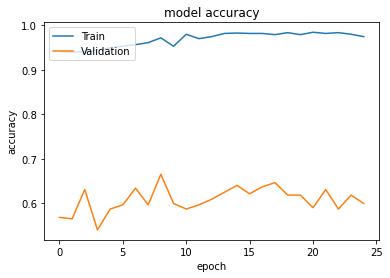

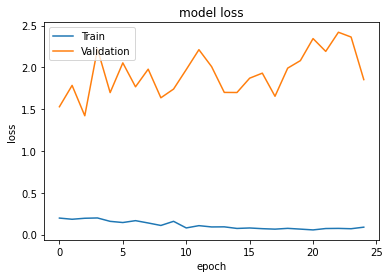

In [15]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Loss function measures how well (or bad) our model is doing. For training set, the loss is around 0.0751; and for test set, the loss is around 2.9547. This means that training model performs well while the test model does not do a good job.

### Plot the validation accuracy function

# Making Prediction

To know if the CNN model can accurately predict my personality, I took a few images of my shoes. In the unknown folder, there is images of my pink boots, black sneaker, and white Vans. 

In [22]:
import numpy as np
import os
from keras.preprocessing import image
import keras.utils
result =[]
path = 'Unknown'
for img in os.listdir(path):
    test_image = keras.utils.load_img(path+"/"+img, target_size = (64, 64))
    test_image = keras.utils.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result.append(Model.predict(test_image))
    predict = Model.predict(test_image)
    #print (result[i][0][0])
    if predict[0][0] == 1:
        prediction = 'Boots- always looking ahead'
    elif predict[0][1] == 1:
        prediction = 'FlashyStilettos-you are hard working and have excellent taste'
    elif predict[0][2] == 1:
        prediction = 'Flats-behind-the-scenes leader'
    elif predict[0][3] == 1:
        prediction = 'FlipFlops-laid back'
    elif predict[0][4] == 1:
        prediction = 'Sneakers-you get along with everyone'
    print(img + " = "+ prediction)
    # in alphabetical order

1/1 [==============================] - 0s 21ms/step
blackSneaker.jpg = Flats-behind-the-scenes leader
1/1 [==============================] - 0s 20ms/step
PinkBoots.jfif = Flats-behind-the-scenes leader
1/1 [==============================] - 0s 17ms/step
vans-off-white-og-authentic-lx-sneakers.jpg = FlipFlops-laid back


Unfortunately, my model predicts all three all wrong.

## Model Accuracy

In [23]:
Model.evaluate(training_set)

 9/35 [======>.......................] - ETA: 10s - loss: 0.0479 - accuracy: 0.9896

C:\Users\muyan\anaconda3\lib\site-packages\PIL\Image.py:945: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


35/35 [==============================] - 15s 419ms/step - loss: 0.0608 - accuracy: 0.9820


[0.060818400233983994, 0.9820305705070496]

In [24]:
Model.evaluate(test_set)

10/10 [==============================] - 0s 42ms/step - loss: 1.8537 - accuracy: 0.6000


[1.8536640405654907, 0.6000000238418579]

# Discussion

## Model 1: 32 filters

Model 1 is built with 32 filters. Based on the accuracy evaluation, the training loss is 0.039 and the validation loss is 2.41; the training accuracy is 0.99 and the validation accuracy is 0.65. The validation loss is higher than the training loss, and the validation accuracy is lower than the traininng accuracy. 

## Model 2: 10 filters

Model 2 is built with 10 filters. Based on the accuracy evaluation, the training loss is 0.06 and the validation loss is 1.85; the training accuracy is 0.98 and the training validation is 0.60. </br>

It is noticeable that model 2 has higher training loss but lower validation loss, and both training and validation accuraies for model 1 and model 2 are about the same.

For both model 1 and model 2, the loss is smaller than accuracy, meaning that low errors on a few data. This is ideal.

*
Loss can be seen as a distance between the true values of the problem and the values predicted by the model. Greater the loss is, more huge is the errors made on the data.

*
Accuracy can be seen as the number of error made on the data